# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [59]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [60]:
from scipy.stats.mstats import winsorize
import sklearn as sk
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [61]:
filename = os.path.join("data", "adultData.csv")
df = pd.read_csv(filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [62]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [63]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


## Self Notes - Mathew Mouchamel
`capital-gain` and `capital-loss` have outliers. Use winsorization.

In [64]:
# Check which columns have NaN values
for col in df.columns:
    if df[col].isna().any():
        print(f"{col}: {df.dtypes[col]}")

age: float64
workclass: object
occupation: object
hours-per-week: float64
native-country: object


## Self Notes - Mathew Mouchamel
1. Replace `age` NaN values with mean value.
2. Replace `workclass`, `occupation`, and `native-country` NaN values with mode.

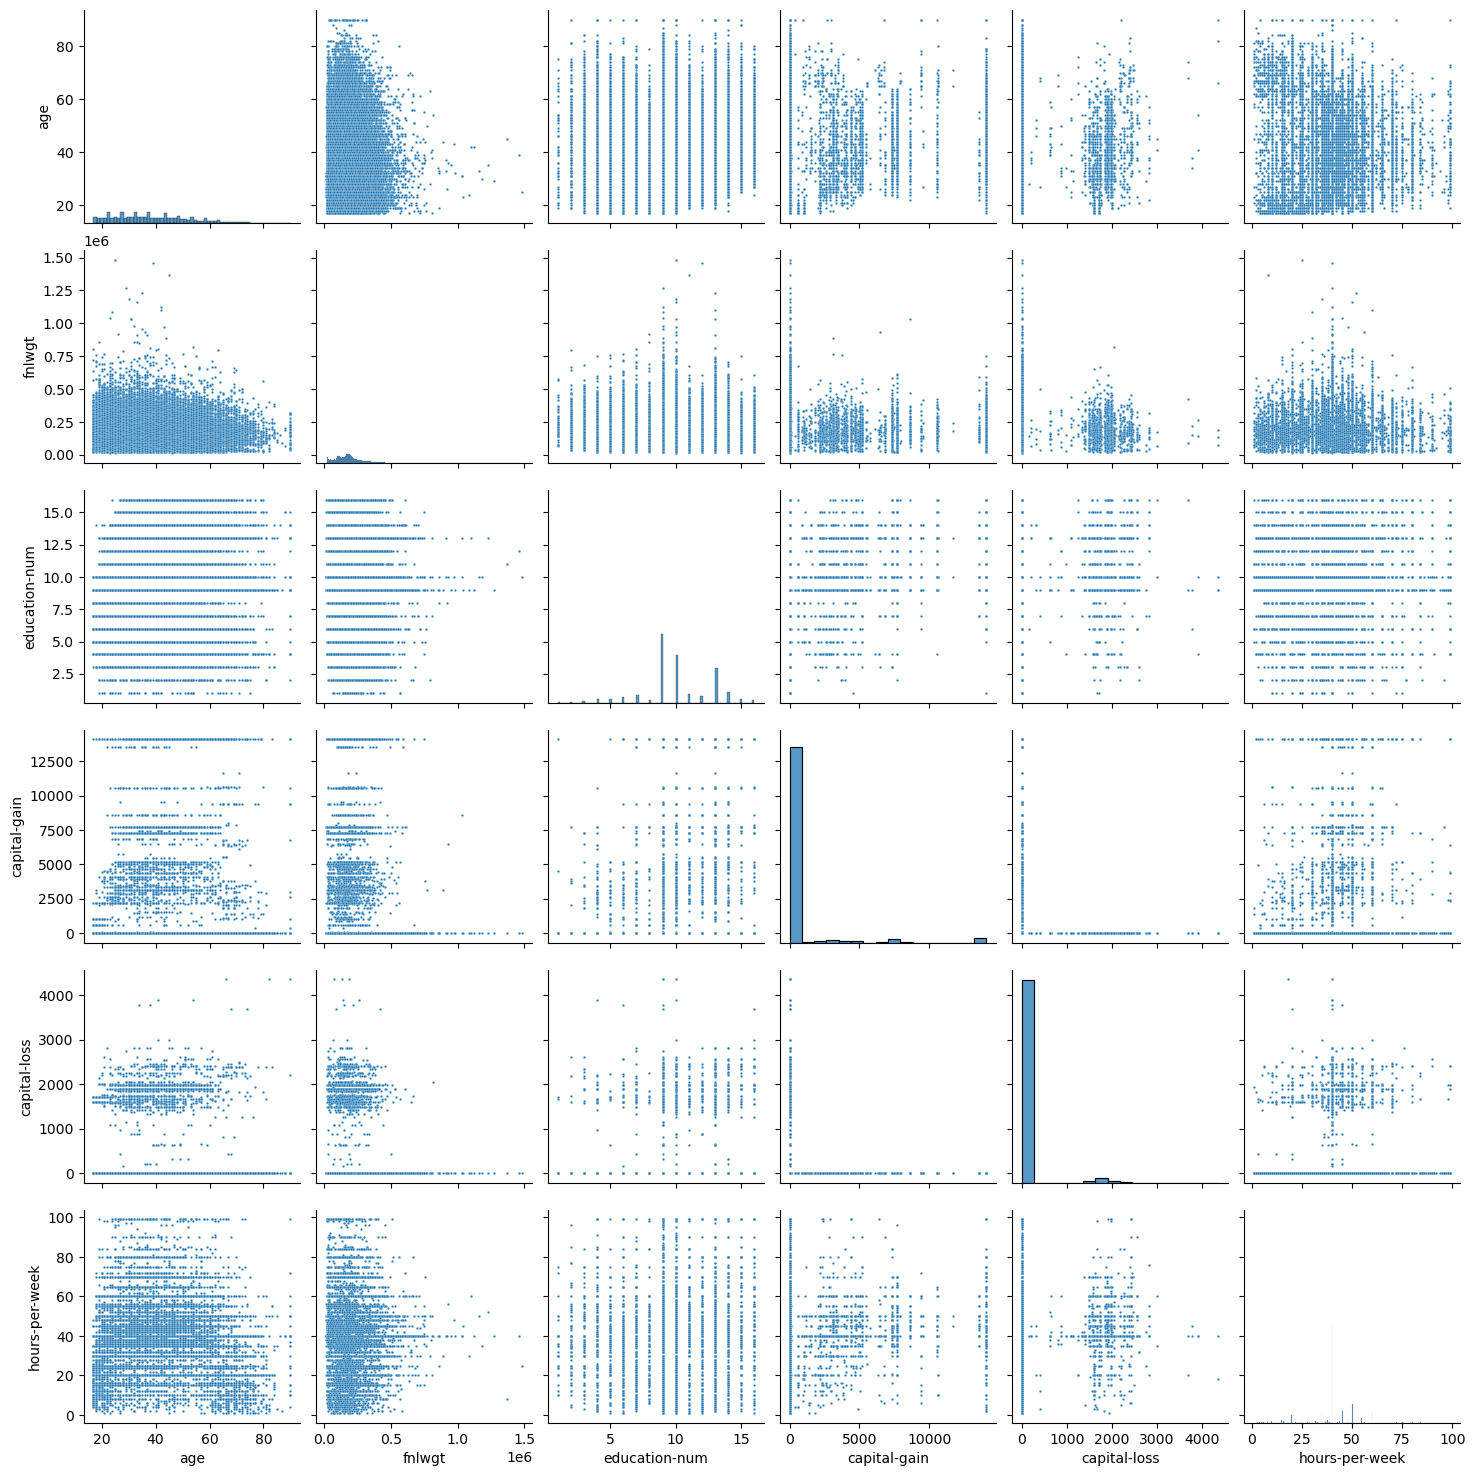

In [65]:
plot_vals = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].copy()
sns.pairplot(data=plot_vals, plot_kws={'s':3})

## Self Notes - Mathew Mouchamel
1. Linear relationship between `capital-gain` and `capital-loss`.
`capital-gain` and `capital-loss` data are right-skewed.
2. Use winsorization on `fnlwgt`.
3. Remove `capital-gain` and `capital-loss`. Values too scattered; too many zeros.

In [66]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

print("Numeric Features:\n")
print("\n".join(numeric_columns))

Numeric Features:

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


In [67]:
object_columns = df.select_dtypes(include=["object", "category"]).columns

print("Categorical Features:\n")
print("\n".join(object_columns))

Categorical Features:

workclass
education
marital-status
occupation
relationship
race
sex_selfID
native-country
income_binary


In [68]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', 
             '9th', '10th', '11th', '12th', 'HS-grad', 
             'Prof-school', 'Assoc-acdm', 'Assoc-voc', 
             'Some-college', 'Bachelors', 'Masters', 'Doctorate']

df['education'] = pd.Categorical(df['education'], cat_order)

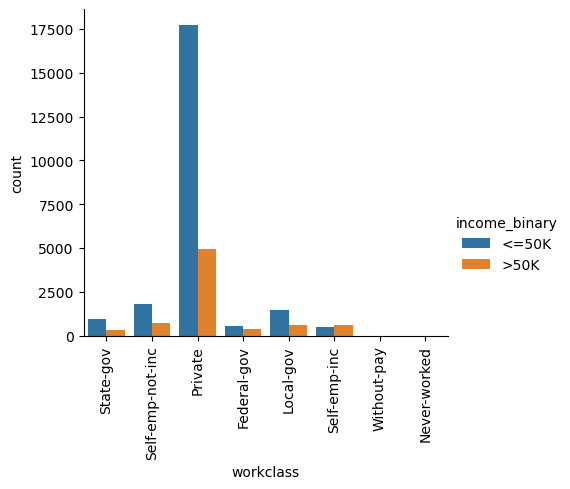

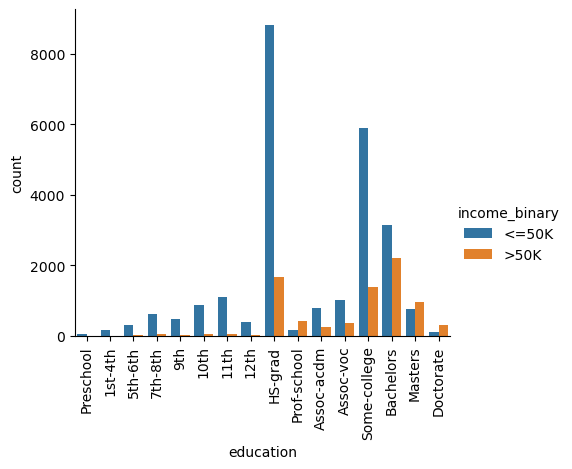

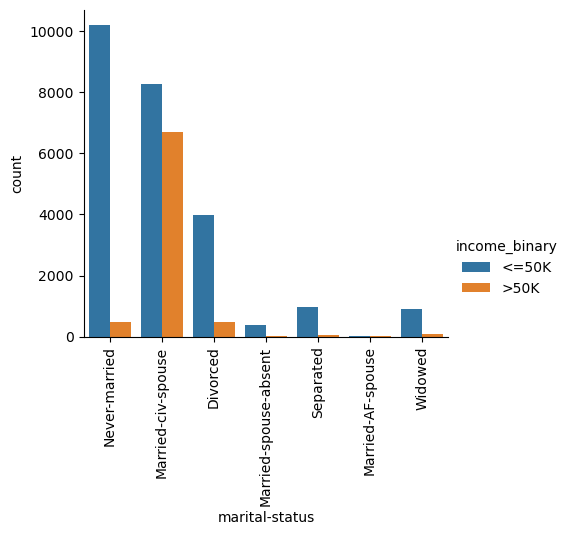

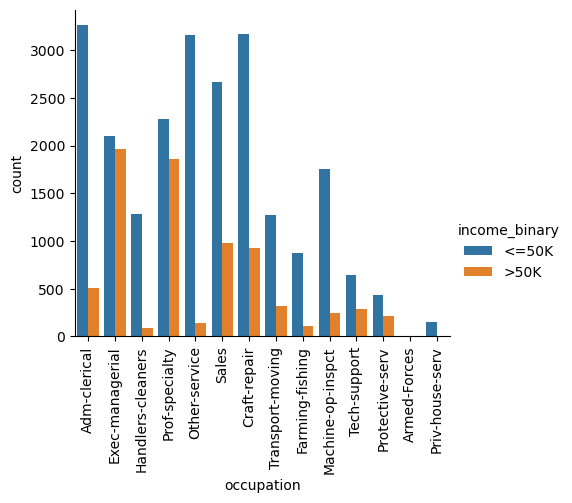

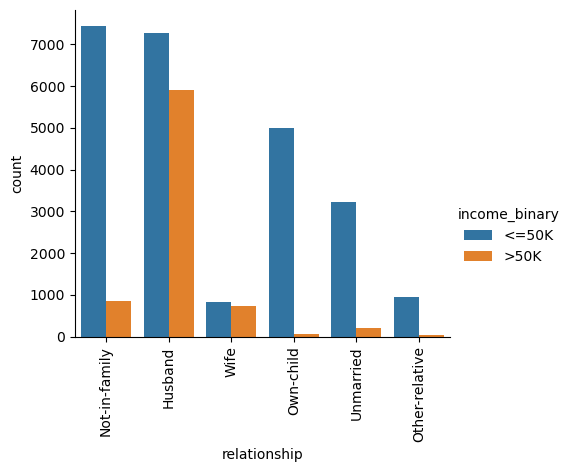

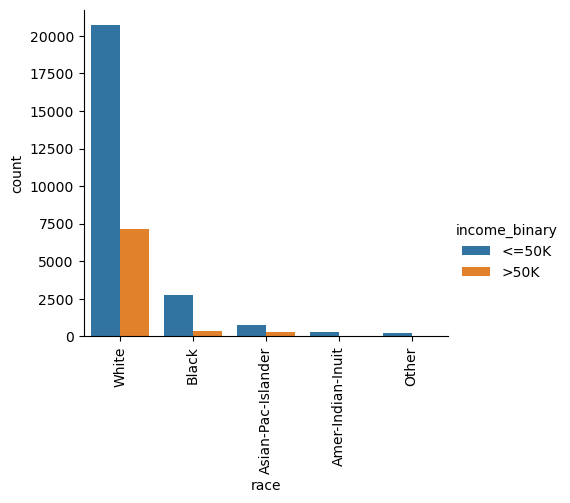

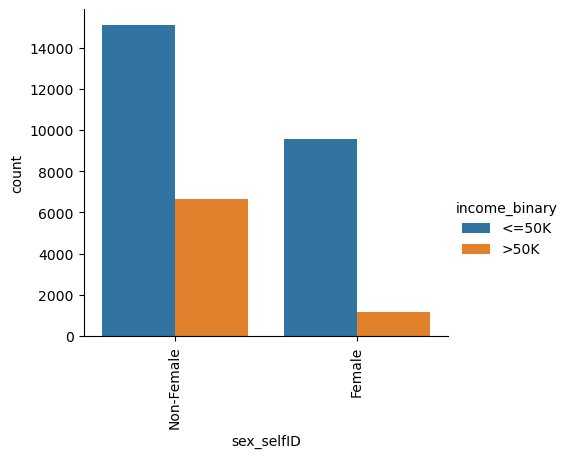

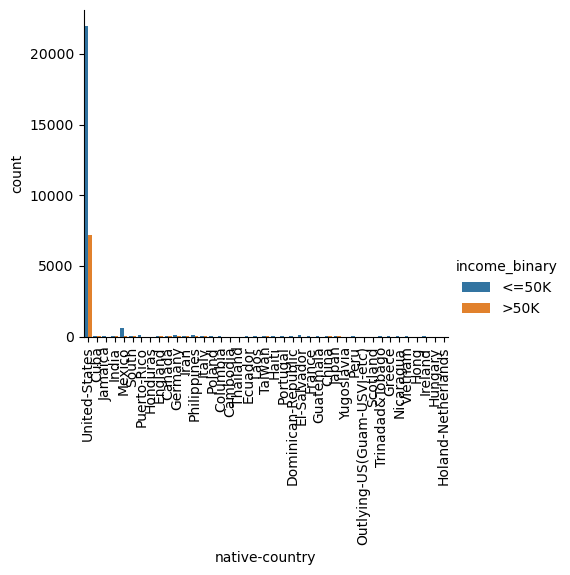

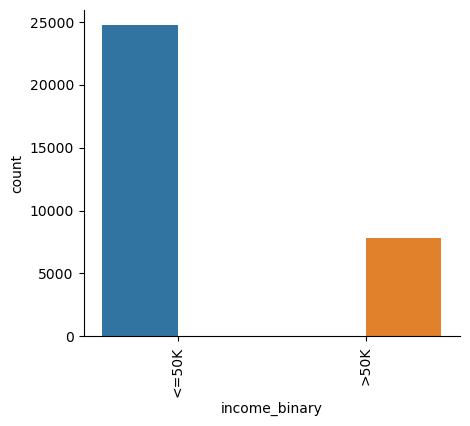

In [69]:
for col in object_columns:
    # Create a categorical plot for each categorical column
    fig = sns.catplot(data=df, kind="count", x=col, hue="income_binary", height=4, aspect=1.2)

    # Rotate x-axis tick labels for each subplot
    for ax in fig.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.show()

## Self Notes - Mathew Mouchamel
1. `workclass`: Change to `Private` and `Not-private`. Then change feature name to `Workclass-Private` and use `0` and `1` values.
2. `education`: Remove feature and just use `education-num`
3. `marital-status`: Change to `Never-married`, `Married`, `Divorced-other`. Use one-hot-encoding.
4. `occupation`: Use one-hot-encoding.
5. `relationship`: Use one-hot-encoding.
6. `race`: Change to `White` and `Not-white`. Then change feature name to `Race-White` and use `0` and `1`.
7. `sex-selfID`: Change feature name to `sex-selfID-Female` and use `0` and `1`.
8. `native-country`: Change feature name to `native-country-US` and use `0` and `1`.
9. `income_binary`: Change feature name to `label`. Change to `0` and `1` to classify if the income is >50K.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

## Self Notes - Mathew Mouchamel
<b>Both: </b>
1. <mark>Replace `age` and `hours-per-week` NaN values with mean value.</mark>
2. <mark>Replace `workclass`, `occupation`, and `native-country` NaN values with mode.</mark>

<b>Numeric: </b>
1. <mark>Linear relationship between `capital-gain` and `capital-loss`.
`capital-gain` and `capital-loss` data are right-skewed.</mark>
2. <mark>Use winsorization on `fnlwgt`.</mark>
3. <mark>Remove `capital-gain` and `capital-loss`. Values too scattered; too many zeros.</mark>

<b>Categorical: </b>
1. <mark>`workclass`: Change to `Private` and `Not-private`. Then change feature name to `Workclass-Private` and use `0` and `1` values.</mark>
2. `education`: Remove feature and just use `education-num`
3. <mark>`marital-status`: Change to `Never-married`, `Married`, `Divorced-other`. Use one-hot-encoding.</mark>
4. <mark>`occupation`: Use one-hot-encoding.</mark>
5. <mark>`relationship`: Use one-hot-encoding.</mark>
6. <mark>`race`: Change to `White` and `Not-white`. Then change feature name to `Race-White` and use `0` and `1`.</mark>
7. <mark>`sex-selfID`: Change feature name to `sex-selfID-Female` and use `0` and `1`.</mark>
8. <mark>`native-country`: Change feature name to `native-country-US` and use `0` and `1`.</mark>
9. <mark>`income_binary`: Change feature name to `label`. Change to `0` and `1` to classify if the income is >50K.</mark>

In [70]:
# (Both) 1. Replace `age` NaN values with mean value.

nan_numeric = ["age", "hours-per-week"]
for col in nan_numeric:
    mean = df[col].mean()
    df[col].fillna(value=mean, inplace=True)

In [71]:
# (Both) 2. Replace workclass, occupation, and native-country NaN values with mode.

nan_categorical = ["workclass", "occupation", "native-country"]

for col in nan_categorical:
    mode = df[col].mode()[0]
    df[col].fillna(value=mode, inplace=True)

In [72]:
# Check which columns have NaN values
for col in df.columns:
    if df[col].isna().any():
        print(f"{col}: {df.dtypes[col]}")
        
# No more NaN values!

In [73]:
# (Numeric) 2. Use winsorization on fnlwgt, capital-gain, and capital-loss.

lower_threshold = 0
upper_threshold = np.percentile(df["fnlwgt"], 90)

df["fnlwgt"] = np.clip(df["fnlwgt"], lower_threshold, upper_threshold)

In [74]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.589216,181731.622063,10.080679,615.907773,87.303830,40.450428
std,13.613868,84947.824209,2.572720,2420.191974,402.960219,12.291939
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,329054.000000,16.000000,14084.000000,4356.000000,99.000000


In [75]:
# (numeric) 3. Remove `capital-gain` and `capital-loss`. Values too scattered; too many zeros.
rows = df.shape[0]
capital_loss_num = (df["capital-loss"] == 0).sum()
capital_gain_num = (df["capital-gain"] == 0).sum()

print(f"Number of rows in DataFrame: {rows}")
print(f"Number of capital-loss points: {capital_loss_num}")
print(f"Number of capital-gain points: {capital_gain_num}")

df = df.drop(columns=["capital-loss", "capital-gain"])

Number of rows in DataFrame: 32561
Number of capital-loss points: 31042
Number of capital-gain points: 29849


In [76]:
# (Categorical) 1. `workclass`: Change to `Private` and `Not-private`. Then change feature name to `Workclass-Private` and use `0` and `1` values.

# (Categorical) 1. `workclass`: Change to `Private` and `Not-private`.
df["workclass"] = df["workclass"].replace({"Private": "Private", "Self-emp-not-inc": "Not-Private", 
                                           "Federal-gov": "Not-Private", "Local-gov": "Not-Private",
                                           "State-gov": "Not-Private", "Self-emp-inc": "Not-Private",
                                           "Without-pay": "Not-Private", "Never-worked": "Not-Private"})

# Then change feature name to `Workclass-Private` and use 0 and 1 values.
df["Workclass-Private"] = (df["workclass"] == "Private").astype(int)

# Drop the original "workclass" column.
df.drop(columns="workclass", inplace=True)

In [77]:
# (Categorical) 2. `education`: Remove feature and just use `education-num`

df = df.drop(columns="education")

In [78]:
# (Categorical) 3. `marital-status`: Change to `Never-married`, `Married`, `Divorced-other`. Use one-hot-encoding.

df["marital-status"].unique()

df["marital-status"] = df["marital-status"].replace({"Married-civ-spouse": "Married", "Divorced": "Divorced-other",
                                                     "Married-spouse-absent": "Divorced-other", "Separated": "Divorced-other",
                                                     "Married-AF-spouse": "Divorced-other", "Widowed": "Divorced-other"})

# One-hot encode the "marital-status" column
df = pd.get_dummies(df, columns=["marital-status"], prefix=[""])
df.columns = df.columns.str.replace("_", "")

In [79]:
# 4. (Categorical) `occupation`: Use one-hot-encoding.

# One-hot encode the "occupation" column
df = pd.get_dummies(df, columns=["occupation"])
df.columns = df.columns.str.replace("_", "-")

In [80]:
# 5. (Categorical) `relationship`: Use one-hot-encoding.

# One-hot encode the "relationship" column
df = pd.get_dummies(df, columns=["relationship"])
df.columns = df.columns.str.replace("_", "-")

In [81]:
# 6. (Categorical) `race`: Change to `White` and `Not-white`. Then change feature name to `Race-White` and use `0` and `1`.

# `race`: Change to `White` and `Not-white`
df["race"] = df["race"].replace({"Black": "Not-white", "Asian-Pac-Islander": "Not-white", 
                                 "Amer-Indian-Inuit": "Not-white", "Other": "Not-white"})

# Then change feature name to `Race-white` and use 0 and 1 values.
df["Race-White"] = (df["race"] == "White").astype(int)

# Drop the original "race" column.
df.drop(columns="race", inplace=True)

In [82]:
# 7. (Categorical) `sex_selfID`: Change feature name to `sex-selfID-Female` and use `0` and `1`.

df["sex-selfID-Female"] = (df["sexselfID"] == "Female").astype(int)

# Drop the original "sex_selfID" column.
df.drop(columns="sexselfID", inplace=True)

In [83]:
# 8. (Categorical) `native-country`: Change feature name to `native-country-US` and use `0` and `1`.

df["native-country-US"] = (df["native-country"] == "United-States").astype(int)
df = df.drop(columns="native-country")

In [84]:
# 9. (Categorical) `income-binary`: Change feature name to `label`. Change to `0` and `1` to classify if the income is >50K.

df["label"] = (df["incomebinary"] == ">50K").astype(int)
df = df.drop(columns="incomebinary")

In [85]:
df.head()

,age,fnlwgt,education-num,hours-per-week,Workclass-Private,Divorced-other,Married,Never-married,occupation-Adm-clerical,occupation-Armed-Forces,...,relationship-Husband,relationship-Not-in-family,relationship-Other-relative,relationship-Own-child,relationship-Unmarried,relationship-Wife,Race-White,sex-selfID-Female,native-country-US,label
0,39.0,77516,13,40.0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,50.0,83311,13,13.0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,38.0,215646,9,40.0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,53.0,234721,7,40.0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,28.0,329054,13,40.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [86]:
df.describe()

,age,fnlwgt,education-num,hours-per-week,Workclass-Private,Divorced-other,Married,Never-married,occupation-Adm-clerical,occupation-Armed-Forces,...,relationship-Husband,relationship-Not-in-family,relationship-Other-relative,relationship-Own-child,relationship-Unmarried,relationship-Wife,Race-White,sex-selfID-Female,native-country-US,label
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.589216,181731.622063,10.080679,40.450428,0.753417,0.211971,0.459937,0.328092,0.115783,0.000276,...,0.405178,0.255060,0.030128,0.155646,0.105832,0.048156,0.854274,0.330795,0.913762,0.240810
std,13.613868,84947.824209,2.572720,12.291939,0.431029,0.408711,0.498400,0.469526,0.319969,0.016623,...,0.490934,0.435901,0.170942,0.362525,0.307627,0.214099,0.352837,0.470506,0.280720,0.427581
min,17.000000,12285.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,117827.000000,9.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,37.000000,178356.000000,10.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,48.000000,237051.000000,12.000000,45.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,329054.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
print("Columns:\n")
print("\n".join(list(df.columns)))
print(f"\nNumber of columns: {df.shape[1]}")

Columns:

age
fnlwgt
education-num
hours-per-week
Workclass-Private
Divorced-other
Married
Never-married
occupation-Adm-clerical
occupation-Armed-Forces
occupation-Craft-repair
occupation-Exec-managerial
occupation-Farming-fishing
occupation-Handlers-cleaners
occupation-Machine-op-inspct
occupation-Other-service
occupation-Priv-house-serv
occupation-Prof-specialty
occupation-Protective-serv
occupation-Sales
occupation-Tech-support
occupation-Transport-moving
relationship-Husband
relationship-Not-in-family
relationship-Other-relative
relationship-Own-child
relationship-Unmarried
relationship-Wife
Race-White
sex-selfID-Female
native-country-US
label

Number of columns: 32


## Self Notes - Mathew Mouchamel
Data Preparation phase is done. Start modeling.

In [88]:
# Split data into features and label
y = df["label"]
X = df.drop(columns="label")

# Split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1234)

In [89]:
# Initialize model
model = GradientBoostingClassifier(loss="log_loss", criterion="squared_error", learning_rate=0.1)

# Define the parameter grid
param_grid = {"n_estimators": [50, 100],
              "min_samples_leaf": [1, 100],
              "max_depth": [100, None]}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Perform the grid search on data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='squared_error'),
             param_grid={'max_depth': [100, None], 'min_samples_leaf': [1, 100],
                         'n_estimators': [50, 100]})

In [90]:
best_model = GradientBoostingClassifier(loss="log_loss", criterion="squared_error", learning_rate=0.1, max_depth=100, min_samples_leaf=100, n_estimators=50)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=100,
                           min_samples_leaf=100, n_estimators=50)

In [91]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
auc_score = roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

Accuracy: 0.8267990582454704
AUC Score: 0.7404964287169576


## Comment for Grader
I ran a Random Forest model using Grid Search and it performed worse than the Gradient Boosted Decision Tree. I removed it for an optimal runtime on this program.